Generate smiles string with minGPT
* import
* read dataset with smiles strings
    * need to create a meta file somehow ?
        * smiles itself
        * raw formula
        * properties
        * train/test split, if not already available
    * filter molecules based on stuff once we have the meta information
* EDA:
    * once the meta is here
* data loader
    * tokeniser ?
    * stoi/itos
    * phase ?
* model
    * straightforward for the moment
    * later: with properties, will need to cat them with embeddings somehow
* training loop:
    * straighforward from minGPT
    * 
* exploitation
    * need helpers functions
    * look for ratio of valid smiles string generated

## Import

In [54]:
from rdkit import Chem
import pandas as pd
import os
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
import string

In [3]:
def CHNO_only(mol):
    for atom in mol.GetAtoms():
        symb = atom.GetSymbol()
        if symb not in ['C','H','N','O']:
            return False
    return True

def info_from_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    n_atoms = mol.GetNumAtoms()
    MolFormula = CalcMolFormula(mol)
    l = len(smiles)
    CHNO = CHNO_only(mol)
    return pd.Series([n_atoms,MolFormula,l,CHNO])#pd.DataFrame({'n_atoms':n_atoms,'MolFormula':MolFormula,'l':l}, index=[0])


In [6]:
raw_path = '/home/teleport/perso/raw/'
process_path = '/home/teleport/perso/process/'
data_path = '/home/teleport/perso/'

if not os.path.exists(process_path):
    os.mkdir(process_path)

## Read one of the file

In [90]:
idx = 2
data = pd.read_csv(raw_path + os.listdir(raw_path)[idx], sep = '\t')
data = data[['smiles', 'mwt', 'logp']]
meta = data['smiles'].apply(info_from_smiles)
meta.columns = ['n_atoms','MolFormula','l','CHNO']

data = pd.concat([data, meta], axis=1)

data.to_csv(process_path + os.listdir(raw_path)[idx])

CCOc1ccc(C(=O)Nc2nnc(-c3ccco3)s2)cc1OCC


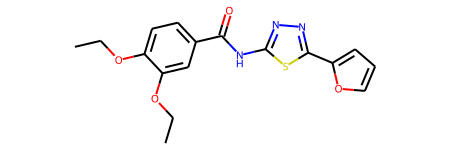

In [97]:
print(data['smiles'][0])
Chem.MolFromSmiles(data['smiles'][0])

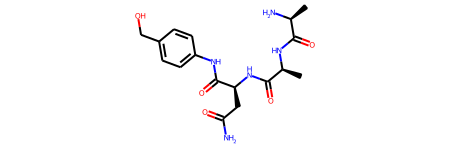

In [5]:
Chem.MolFromSmiles('C[C@H](N)C(=O)N[C@@H](C)C(=O)N[C@@H](CC(N)=O)C(=O)Nc1ccc(CO)cc1')

<AxesSubplot:ylabel='Density'>

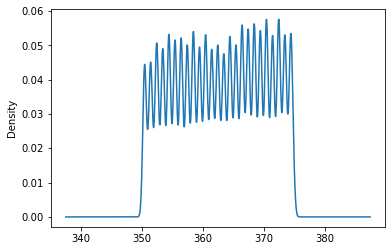

In [100]:
data['mwt'].plot.density()

## Apply the function to all files

In [9]:
for i in os.listdir(raw_path):
    if not os.path.exists(process_path + i):
        print(i)

        data = pd.read_csv(raw_path + i, sep = '\t')
        print(len(data))
        data = data.sample(frac=0.02, replace=False, random_state=1)
        print(len(data))
        if len(data) > 0:
            data = data[['smiles', 'mwt', 'logp']]
            data['has_non_CHNO'] = data['smiles'].str.contains('Br|I|P|F|Cl|S|s|p',regex=True)
            data = data[(data['has_non_CHNO'] == False)].reset_index()
            data = data[['smiles', 'mwt', 'logp']]
            meta = data['smiles'].apply(info_from_smiles)
            meta.columns = ['n_atoms','MolFormula','l','CHNO']

            data = pd.concat([data, meta], axis=1)

            data.to_csv(process_path + i)

EDADaf
10000000
200000
EDADag
793795
15876
EDADab
10000000
200000
EDADaa


/home/teleport/.conda/envs/rdkit/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


10000000
200000
EDADae
10000000
200000
EDADad
10000000
200000
EDADac
10000000
200000
HDCB.txt
606
12
FKAD.txt
1032633
20653
CCBB.txt
1080
22
FBBB.txt
56
1
AGAD.txt
29511
590
CHBA.txt
1969
39
BFAD.txt
1592979
31860
GKBA.txt
2144
43
EBBB.txt
88
2
CJCB.txt
522
10
FDBB.txt
1433
29
HDAC.txt
5
0
CKAD.txt
30466
609
GGAB.txt
49465
989
JKCD.txt
37529
751
FJAC.txt
25
0
FJBB.txt
1271
25
HBAC.txt
5
0
EACB.txt
16
0
CHAD.txt
5162853
103257
AHCB.txt
31
1
FEBA.txt
1803
36
GHBD.txt
474656
9493
FICA.txt
2110
42
FBAB.txt
2572
51
JJBC.txt
2
0
JACD.txt
735
15
EECA.txt
1202
24
IACA.txt
19
0
CDCB.txt
1002
20
HGCB.txt
2230
45
JBAC.txt
1
0
AHAD.txt
9305
186
DHCD.txt
74197
1484
BJBA.txt
54
1
KECB.txt
486
10
DKAC.txt
11
0
HFBA.txt
1775
36
KHBB.txt
3999
80
JHBD.txt
285759
5715
JEAB.txt
11497
230
HKAB.txt
43929
879
ABCB.txt
78
2
JIAB.txt
60610
1212
DABB.txt
64
1
BCBA.txt
1478
30
FFAB.txt
47469
949
HGAA.txt
44405
888
CHAC.txt
164
3
KGAC.txt
26
1
JGAC.txt
20
0
JCCA.txt
127
3
KHBA.txt
1554
31
DFCA.txt
1180
24
AICB.tx

## combine the files

In [10]:
data = [pd.read_csv(process_path + i) for i in os.listdir(process_path)]
data = pd.concat(data)
data = data[['smiles', 'mwt', 'logp','n_atoms','MolFormula','l','CHNO']]

In [ ]:
data = data[(data['CHNO'] == True)].reset_index()

In [32]:

data = data[(data['mwt'] <= 500)]#.reset_index()
data = data[(data['mwt'] > 100)]

In [38]:
data.to_csv(data_path + '/2pc_cleaned.csv')

In [37]:
max(data['l'])

127.0

In [36]:
len(data)

8659463

## EDA with what we have now

In [7]:
data = pd.read_csv(data_path + '/2pc_cleaned.csv')

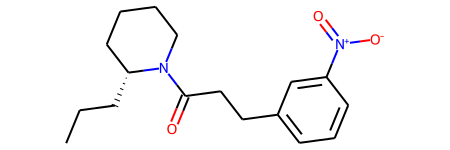

In [33]:
Chem.MolFromSmiles('CCC[C@@H]1CCCCN1C(=O)CCc1cccc([N+](=O)[O-])c1')

In [67]:
data['l_MolFormula'] = data['MolFormula'].apply(len)

In [68]:
data['l_chunk'] = data['l'] + data['l_MolFormula'] + 2

In [70]:
max(data['l_chunk'])

140.0

In [78]:
data

,Unnamed: 0,level_0,index,smiles,mwt,logp,n_atoms,MolFormula,l,CHNO,l_MolFormula,l_chunk,train
0,2,2,1,O=C(CCCC(=O)N1CC(=O)Nc2ccccc21)NCCc1cc(O)c(O)cc1O,413.430,1.618,30.0,C21H23N3O6,49.0,True,10,61.0,False
1,3,3,2,CC(C)(C)OC(=O)N1CCC2(CC1)CN(Cc1c(O)cc(O)cc1O)C...,407.467,1.505,29.0,C20H29N3O6,53.0,True,10,65.0,False
2,4,4,7,COc1cc(CN2CCN(C(=O)[C@H]3COc4ccccc4O3)CC2)c(O)...,414.458,1.894,30.0,C22H26N2O6,53.0,True,10,65.0,False
3,5,5,13,COc1ccc(N2CCN(CCN3C(=O)N[C@@H]([C@@H]4CCCOC4)C...,402.495,1.164,29.0,C21H30N4O4,57.0,True,10,69.0,False
4,6,6,15,CN1CCOc2cc(CN3C[C@@H]4COC[C@@H](C(=O)N5CCCCO5)...,401.507,1.764,29.0,C22H31N3O4,61.0,True,10,73.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659458,8661698,8661698,3103,CCC[C@H](OC)c1noc(C(C)(C)c2ccc([N+](=O)[O-])cc...,319.361,3.791,23.0,C16H21N3O4,50.0,True,10,62.0,False
8659459,8661699,8661699,3105,COc1ccc([N+](=O)[O-])cc1Nc1ccnn1-c1cccc(C)c1,324.340,3.841,24.0,C17H16N4O3,44.0,True,10,56.0,False
8659460,8661700,8661700,3107,COc1cccc(N[C@@H]2CCO[C@@H](C(C)(C)C)C2)c1[N+](...,308.378,3.609,22.0,C16H24N2O4,53.0,True,10,65.0,False
8659461,8661701,8661701,3109,CCC[C@@H]1CCCCN1C(=O)CCc1cccc([N+](=O)[O-])c1,304.390,3.709,22.0,C17H24N2O3,45.0,True,10,57.0,False


<AxesSubplot:xlabel='l', ylabel='mwt'>

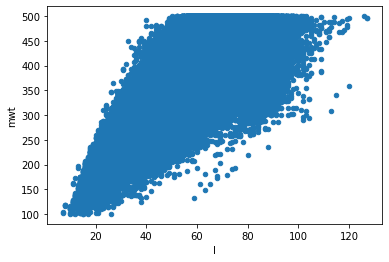

In [8]:
data.plot.scatter('l','mwt')

<AxesSubplot:ylabel='Density'>

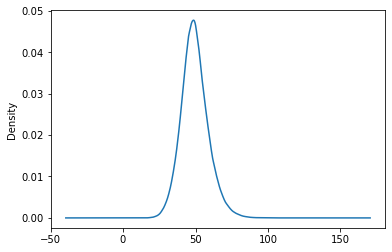

In [14]:
data.sample(frac=0.05, replace=False, random_state=1)['l'].plot.density()

<AxesSubplot:ylabel='Density'>

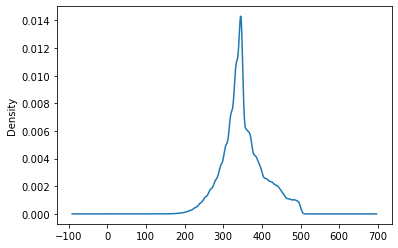

In [10]:
data.sample(frac=0.05, replace=False, random_state=1)['mwt'].plot.density()

<AxesSubplot:ylabel='Density'>

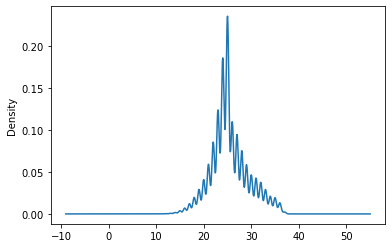

In [13]:
data.sample(frac=0.05, replace=False, random_state=1)['n_atoms'].plot.density()

<AxesSubplot:ylabel='Density'>

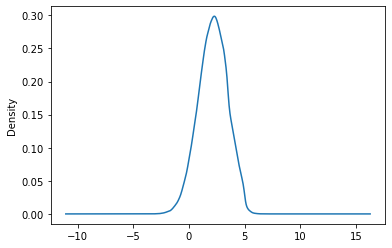

In [11]:
data.sample(frac=0.05, replace=False, random_state=1)['logp'].plot.density()

In [ ]:
## number of unique MolFormula
len(data['MolFormula'].unique())

## Work on word list and test it

In [47]:
sum(data['smiles'].str.contains('8',regex=False))

13

In [63]:
word_list = ['C','c','N','n','O','o','H','[',']','(',')','-','+','=','@','/','\\','#','$','&']
word_list += list(string.digits)
stoi = { ch:i for i,ch in enumerate(word_list) }
itos = { i:ch for i,ch in enumerate(word_list) }
## % and $ and * and & are not in the dataset

In [59]:
def tokenize_smiles(smiles, molecular_formula, stoi, block_size = None, stop_token = '$', split_token = '&'):
    chunk = molecular_formula + split_token + smiles + stop_token
    if block_size is not None:
        chunk = chunk + stop_token*(block_size - len(chunk))
    data = [stoi[s] for s in chunk]
    return data

In [71]:
for idx in range(len(data)):
    try:
        truc = tokenize_smiles(data['smiles'][idx],data['MolFormula'][idx], stoi, block_size=140)
    except:
        print('error in tokenize_smiles: idx = ' + str(idx))
        print(data['smiles'][idx])
    if idx % 1000000 == 0:
        print(idx)

0
error in tokenize_smiles: idx = 905932
CC(C)C(C)(C)Cn1c(-c2cccn2C)nnc1N1CCC[C@H]1C
1000000
error in tokenize_smiles: idx = 1318324
Cc1cc(C(=O)N[C@@]2(C)CCN(C(=O)[C@@H]3CCCNC3=O)C2)oc1C
error in tokenize_smiles: idx = 1330890
CN(C)c1ccc(C(=O)N(C)C2CN(C(=O)C[C@H]3C=CCC3)C2)nn1
2000000
3000000
4000000
5000000
6000000
7000000
8000000


## Deal with train_test_split

In [133]:
MolForm_train = list(pd.Series(data['MolFormula'].unique()).sample(frac = 0.998,random_state = 1))
data['train'] = data['MolFormula'].isin(MolForm_train)
data['train'].value_counts()#.plot.bar()

True     8605866
False      53597
Name: train, dtype: int64

In [99]:
data

,smiles,mwt,logp,n_atoms,MolFormula,l,CHNO,l_MolFormula,l_chunk,train
0,O=C(CCCC(=O)N1CC(=O)Nc2ccccc21)NCCc1cc(O)c(O)cc1O,413.430,1.618,30.0,C21H23N3O6,49.0,True,10,61.0,True
1,CC(C)(C)OC(=O)N1CCC2(CC1)CN(Cc1c(O)cc(O)cc1O)C...,407.467,1.505,29.0,C20H29N3O6,53.0,True,10,65.0,True
2,COc1cc(CN2CCN(C(=O)[C@H]3COc4ccccc4O3)CC2)c(O)...,414.458,1.894,30.0,C22H26N2O6,53.0,True,10,65.0,True
3,COc1ccc(N2CCN(CCN3C(=O)N[C@@H]([C@@H]4CCCOC4)C...,402.495,1.164,29.0,C21H30N4O4,57.0,True,10,69.0,True
4,CN1CCOc2cc(CN3C[C@@H]4COC[C@@H](C(=O)N5CCCCO5)...,401.507,1.764,29.0,C22H31N3O4,61.0,True,10,73.0,True
...,...,...,...,...,...,...,...,...,...,...
8659458,CCC[C@H](OC)c1noc(C(C)(C)c2ccc([N+](=O)[O-])cc...,319.361,3.791,23.0,C16H21N3O4,50.0,True,10,62.0,True
8659459,COc1ccc([N+](=O)[O-])cc1Nc1ccnn1-c1cccc(C)c1,324.340,3.841,24.0,C17H16N4O3,44.0,True,10,56.0,True
8659460,COc1cccc(N[C@@H]2CCO[C@@H](C(C)(C)C)C2)c1[N+](...,308.378,3.609,22.0,C16H24N2O4,53.0,True,10,65.0,True
8659461,CCC[C@@H]1CCCCN1C(=O)CCc1cccc([N+](=O)[O-])c1,304.390,3.709,22.0,C17H24N2O3,45.0,True,10,57.0,True


True     8656691
False       2772
Name: train, dtype: int64

## save the final file, we are ready for training

In [92]:
data.columns

Index(['smiles', 'mwt', 'logp', 'n_atoms', 'MolFormula', 'l', 'CHNO',
       'l_MolFormula', 'l_chunk', 'train'],
      dtype='object')

In [134]:
data = data[['smiles', 'mwt', 'logp', 'n_atoms',
       'MolFormula', 'l', 'CHNO', 'l_MolFormula', 'l_chunk', 'train']]

In [135]:
data.to_csv(data_path + '/2pc_cleaned.csv',index = False)